In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots as sp
import plotly.graph_objects as go

In [2]:
# Importing the data
housing = pd.read_csv('All_Data.csv')

GrLivArea
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GarageArea
WoodDeckSF
OpenPorchSF
PoolArea
LotArea
BsmtFinSF1
BsmtFinSF2

In [3]:
housing_area = pd.DataFrame(housing[[
                      'SalePrice',  
                      'GrLivArea',
                      'BsmtUnfSF',
                      'BsmtFinSF1',
                      'BsmtFinSF2',
                      'TotalBsmtSF',
                      '1stFlrSF',
                      '2ndFlrSF',
                      'LowQualFinSF',
                      'GarageArea',
                      'WoodDeckSF',
                      'OpenPorchSF',
                      'PoolArea',
                      'LotArea']])

In [4]:
housing_area['BsmtUnfSF'].describe()

count    2578.000000
mean      539.194725
std       425.255818
min         0.000000
25%       215.000000
50%       448.000000
75%       784.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

<AxesSubplot:>

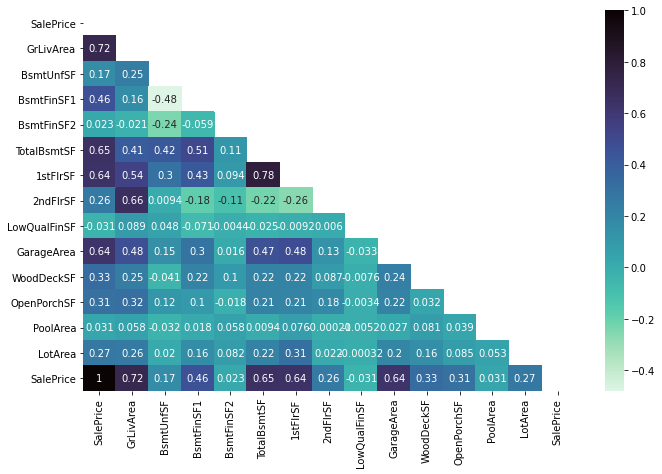

In [5]:
y = housing.SalePrice.copy()
corr = pd.concat([housing_area, y], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corr, mask=mask, annot=True, cmap='mako_r')

In [9]:
basement_area = pd.DataFrame(housing_area[['BsmtUnfSF',
                                          'BsmtFinSF1',
                                          'BsmtFinSF2',
                                          'TotalBsmtSF']])

for col in basement_area:
    fig = px.scatter(basement_area, x= col,y=y,trendline='ols')
    fig.show()

In [7]:
outside_area = pd.DataFrame(housing_area[[
                                        'WoodDeckSF',
                                        'OpenPorchSF',
                                        'PoolArea',
                                        'LotArea']])

for col in outside_area:
    fig = px.scatter(outside_area, x= col,y=y,trendline='ols')
    fig.show()

In [8]:
outside_area = pd.DataFrame(housing_area[['GrLivArea',
                                        '1stFlrSF',
                                        '2ndFlrSF',
                                        'LowQualFinSF']])

for col in outside_area:
    fig = px.scatter(outside_area, x= col,y=y,trendline='ols')
    fig.show()